In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#loading datasets
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path1 = "/content/drive/MyDrive/Polynomial_train.csv"
path2 = "/content/drive/MyDrive/Polynomial_test.csv"
Polynomial_Train = pd.read_csv(path1)
Polynomial_Test= pd.read_csv(path2)
Train = Polynomial_Train.to_numpy()
Test = Polynomial_Test.to_numpy()

In [ ]:
def standardisation (A):
  A_mean = A.mean()
  A_std_dev = A.std()
  A_standarised = (A - A_mean)/ A_std_dev
  return A_standarised

def learning_algo_LR( iterations, alpha, X, Y) :
  theta = np.ones((X.shape[1], 1))
  m = X.shape[0]
  for i in range(iterations):
    hyp = np.dot (X, theta)
    cost = (1/(2*m))*(np.sum(np.square(hyp-Y)))
    grad = (1/m)*(np.dot(X.T, (hyp-Y)))
    #vectrized format, feature*(hyp-y)
    theta_1 = theta - alpha*grad
    theta = theta_1
    plt.scatter(i, cost)
    #plt.scatter(i, theta)  theta is a vector this doesnt make any sense
    print(cost)
  #Y_Pred = np.dot(X_Test, theta)
  return theta


def rms_error(A, B) :
  rms_error = np.sqrt((1/A.shape[0])*(np.sum(np.square(A-B))))
  return rms_error

In [ ]:
C0 = np.reshape(np.ones(Polynomial_Train.shape[0]), (50000,1))
C1 = np.reshape(Train[:,1], (50000,1))
C2 = np.reshape(Train[:,2], (50000,1))
C3 = np.reshape(Train[:,3], (50000,1))



In [ ]:
C4 = np.reshape(np.multiply(C1, C1), (50000,1))
C5 = np.reshape(np.multiply(C2, C2), (50000,1))
C6 = np.reshape(np.multiply(C3, C3), (50000,1))
C7 = np.reshape(np.multiply(C1, C2), (50000,1))
C8 = np.reshape(np.multiply(C3, C2), (50000,1))
C9 = np.reshape(np.multiply(C1, C3), (50000,1))

In [ ]:
C10 = np.reshape(np.multiply((C1*C1),C1), (50000,1))
C11 = np.reshape(np.multiply((C1*C1),C3), (50000,1))
C12 = np.reshape(np.multiply((C1*C1),C2), (50000,1))
C13 = np.reshape(np.multiply((C2*C2),C2), (50000,1))
C14 = np.reshape(np.multiply((C2*C2),C3), (50000,1))
C15 = np.reshape(np.multiply((C2*C2),C1), (50000,1))
C16 = np.reshape(np.multiply((C3*C3),C3), (50000,1))
C17 = np.reshape(np.multiply((C3*C3),C1), (50000,1))
C18 = np.reshape(np.multiply((C3*C3),C2), (50000,1))
C19 = np.reshape(np.multiply((C1*C2),C3), (50000,1))

In [ ]:
Train.shape

(50000, 5)

In [ ]:
Test.shape

(10000, 5)

In [ ]:
X_raw_deg_1 = np.concatenate([C1, C2, C3], axis = 1)
X_raw_deg_1

array([[ 0.64371517, -9.86655011, -5.8360194 ],
       [-1.36644585, -3.76194541, -8.75616193],
       [-4.09026967, -1.83621751, -1.84606561],
       ...,
       [ 6.6167532 , -2.84728822, -0.50404002],
       [ 3.55819907,  4.50752592, -4.8236737 ],
       [ 0.62343079,  8.86323404, -3.2310397 ]])

In [ ]:
X_raw_deg_2 = np.concatenate([C1, C2, C3, C4, C5, C6, C7, C8, C9], axis = 1)
X_raw_deg_2

array([[  0.64371517,  -9.86655011,  -5.8360194 , ...,  -6.35124798,
         57.58137788,  -3.75673422],
       [ -1.36644585,  -3.76194541,  -8.75616193, ...,   5.14049469,
         32.94020319,  11.96482113],
       [ -4.09026967,  -1.83621751,  -1.84606561, ...,   7.51062479,
          3.38977801,   7.55090619],
       ...,
       [  6.6167532 ,  -2.84728822,  -0.50404002, ..., -18.83980346,
          1.4351472 ,  -3.33510838],
       [  3.55819907,   4.50752592,  -4.8236737 , ...,  16.03867453,
        -21.74283426, -17.16359126],
       [  0.62343079,   8.86323404,  -3.2310397 , ...,   5.52561302,
        -28.63746107,  -2.01432964]])

In [ ]:
X_raw_deg_3= np.concatenate([C1, C2, C3, C4, C5, C6, C7, C8, C9, C10, C11, C12, C13, C14, C15, C16, C17, C18, C19], axis = 1)
X_raw_deg_3

array([[   0.64371517,   -9.86655011,   -5.8360194 , ...,   21.92437379,
        -336.04603851,   37.06600642],
       [  -1.36644585,   -3.76194541,   -8.75616193, ..., -104.76591131,
        -288.42975326,  -45.01100391],
       [  -4.09026967,   -1.83621751,   -1.84606561, ...,  -13.93946827,
          -6.25775263,  -13.86510618],
       ...,
       [   6.6167532 ,   -2.84728822,   -0.50404002, ...,    1.68102808,
          -0.72337162,    9.49601482],
       [   3.55819907,    4.50752592,   -4.8236737 , ...,   82.79156379,
         104.88033784,  -77.36533256],
       [   0.62343079,    8.86323404,   -3.2310397 , ...,    6.50837904,
          92.52877365,  -17.85347505]])

In [ ]:
standardisation(X_raw_deg_1)
standardisation(X_raw_deg_2)
standardisation(X_raw_deg_3)

array([[-0.02135447, -0.06899764, -0.05072719, ...,  0.07511105,
        -1.54757367,  0.14374827],
       [-0.03046655, -0.04132539, -0.06396424, ..., -0.49917773,
        -1.33172841, -0.22830793],
       [-0.04281368, -0.03259604, -0.03264068, ..., -0.08746024,
        -0.05263891, -0.08712315],
       ...,
       [ 0.00572139, -0.03717923, -0.02655726, ..., -0.01665231,
        -0.02755149,  0.01877313],
       [-0.00814307, -0.00383976, -0.04613822, ...,  0.35102284,
         0.45115155, -0.37497054],
       [-0.02144642,  0.01590472, -0.03891878, ...,  0.00523013,
         0.39516174, -0.10520248]])

In [ ]:
X_deg_1 = np.concatenate([C0, X_raw_deg_1], axis =1)
X_deg_2 = np.concatenate([C0, X_raw_deg_2], axis =1)
X_deg_3 = np.concatenate([C0, X_raw_deg_3], axis =1)

In [ ]:
X_deg_1

array([[ 1.        ,  0.64371517, -9.86655011, -5.8360194 ],
       [ 1.        , -1.36644585, -3.76194541, -8.75616193],
       [ 1.        , -4.09026967, -1.83621751, -1.84606561],
       ...,
       [ 1.        ,  6.6167532 , -2.84728822, -0.50404002],
       [ 1.        ,  3.55819907,  4.50752592, -4.8236737 ],
       [ 1.        ,  0.62343079,  8.86323404, -3.2310397 ]])

In [ ]:
Y_0 = Train[:,4]
Y_1 = np.reshape(Y_0, (50000,1))


In [ ]:
Y_Test = Test[:,4]
Y_Test_1 = np.reshape(Y_Test, (10000,1))

In [ ]:
D0 = np.reshape(np.ones(Polynomial_Test.shape[0]), (10000,1))
D1 = np.reshape(Test[:,1], (10000,1))
D2 = np.reshape(Test[:,2], (10000,1))
D3 = np.reshape(Test[:,3], (10000,1))

In [ ]:
D4 = np.reshape(np.multiply(D1, D1), (10000,1))
D5 = np.reshape(np.multiply(D2, D2), (10000,1))
D6 = np.reshape(np.multiply(D3, D3), (10000,1))
D7 = np.reshape(np.multiply(D1, D2), (10000,1))
D8 = np.reshape(np.multiply(D3, D2), (10000,1))
D9 = np.reshape(np.multiply(D1, D3), (10000,1))

In [ ]:
D10 = np.reshape(np.multiply((D1*D1),D1), (10000,1))
D11 = np.reshape(np.multiply((D1*D1),D3), (10000,1))
D12 = np.reshape(np.multiply((D1*D1),D2), (10000,1))
D13 = np.reshape(np.multiply((D2*D2),D2), (10000,1))
D14 = np.reshape(np.multiply((D2*D2),D3), (10000,1))
D15 = np.reshape(np.multiply((D2*D2),D1), (10000,1))
D16 = np.reshape(np.multiply((D3*D3),D3), (10000,1))
D17 = np.reshape(np.multiply((D3*D3),D1), (10000,1))
D18 = np.reshape(np.multiply((D3*D3),D2), (10000,1))
D19 = np.reshape(np.multiply((D1*D2),D3), (10000,1))

In [ ]:
X_Test_deg_1 = np.concatenate([D1, D2, D3], axis = 1)
X_Test_deg_1

array([[ 9.32207776,  0.41309646,  5.98473071],
       [ 2.81196379,  6.14275187,  6.41923694],
       [-2.66978441,  7.77509088, -6.93190696],
       ...,
       [ 6.64099656,  6.86487708,  4.51168542],
       [-6.26241442,  1.3232032 , -3.91774828],
       [ 8.28979179, -0.37154051,  2.09903937]])

In [ ]:
X_Test_deg_2 = np.concatenate([D1, D2, D3, D4, D5, D6, D7, D8, D9], axis = 1)
X_Test_deg_2

array([[  9.32207776,   0.41309646,   5.98473071, ...,   3.85091728,
          2.47227105,  55.79012505],
       [  2.81196379,   6.14275187,   6.41923694, ...,  17.2731958 ,
         39.4317797 ,  18.05066179],
       [ -2.66978441,   7.77509088,  -6.93190696, ..., -20.75781641,
        -53.89620658,  18.50669711],
       ...,
       [  6.64099656,   6.86487708,   4.51168542, ...,  45.58962507,
         30.97216585,  29.96208736],
       [ -6.26241442,   1.3232032 ,  -3.91774828, ...,  -8.2864468 ,
         -5.18397707,  24.53456333],
       [  8.28979179,  -0.37154051,   2.09903937, ...,  -3.07999347,
         -0.77987816,  17.40059936]])

In [ ]:
X_Test_deg_3= np.concatenate([D1, D2, D3, D4, D5, D6, D7, D8, D9, D10, D11, D12, D13, D14, D15, D16, D17, D18, D19], axis = 1)
X_Test_deg_3

array([[ 9.32207776e+00,  4.13096456e-01,  5.98473071e+00, ...,
         3.33888875e+02,  1.47958764e+01,  2.30467029e+01],
       [ 2.81196379e+00,  6.14275187e+00,  6.41923694e+00, ...,
         1.15871475e+02,  2.53121937e+02,  1.10880736e+02],
       [-2.66978441e+00,  7.77509088e+00, -6.93190696e+00, ...,
        -1.28286702e+02,  3.73603489e+02,  1.43891252e+02],
       ...,
       [ 6.64099656e+00,  6.86487708e+00,  4.51168542e+00, ...,
         1.35179513e+02,  1.39736669e+02,  2.05686047e+02],
       [-6.26241442e+00,  1.32320320e+00, -3.91774828e+00, ...,
        -9.61202433e+01,  2.03095173e+01,  3.24642127e+01],
       [ 8.28979179e+00, -3.71540510e-01,  2.09903937e+00, ...,
         3.65245432e+01, -1.63699496e+00, -6.46502756e+00]])

In [ ]:
X_Test_1 = np.concatenate([D0, X_Test_deg_1], axis =1)
X_Test_2 = np.concatenate([D0, X_Test_deg_2], axis =1)
X_Test_3 = np.concatenate([D0, X_Test_deg_3], axis =1)

In [ ]:
X_Test_1.shape

(10000, 4)

In [ ]:
standardisation(X_Test_deg_1)
standardisation(X_Test_deg_2)
standardisation(X_Test_deg_3)

array([[ 1.65832584e-02, -2.48833423e-02,  1.04967124e-03, ...,
         1.52727021e+00,  4.20608991e-02,  8.04641368e-02],
       [-1.37178824e-02,  1.78517626e-03,  3.07206814e-03, ...,
         5.12514404e-01,  1.15134278e+00,  4.89285154e-01],
       [-3.92325238e-02,  9.38285187e-03, -5.90704523e-02, ...,
        -6.23912905e-01,  1.71212075e+00,  6.42931661e-01],
       ...,
       [ 4.10424201e-03,  5.14628756e-03, -5.80657625e-03, ...,
         6.02383118e-01,  6.23594273e-01,  9.30553780e-01],
       [-5.59543182e-02, -2.06472763e-02, -4.50411362e-02, ...,
        -4.74195033e-01,  6.77239837e-02,  1.24297669e-01],
       [ 1.17785126e-02, -2.85354128e-02, -1.70361688e-02, ...,
         1.43196362e-01, -3.44254346e-02, -5.68973754e-02]])

1733703.0151833238
811725.6300790446
775060.7348561959
760758.241102829
749009.7113922694
738482.1143921145
728770.3679452919
719633.0368869733
710911.3137355945
702499.2590672892
694325.7440482972
686342.6967177688
678517.3776028455
670827.2841838072
663256.7780784778
655794.844571554
648433.5987242666
641167.2853250655
633991.6066313167
626903.2684813153
619899.6724434078
612978.7060245876
606138.599001955
599377.8245380971
592695.0307659638
586088.9932011713
579558.5814589274
573102.7358432742
566720.4507830442
560410.7630395241
554172.743255986
548005.4898591192
541908.1246236544
535879.7894187967
529919.6437984
524026.86319639586
518200.6375584624
512440.17028965795
506744.677432043
501113.3870106089
495545.5385030666
490040.3824013637
484597.17984160525
479215.20228539035
473893.73124014604
468632.0580093486
463429.4834659218
458285.31784385204
453198.88054433645
448169.4999537158
443196.5132711288
438279.2663443333
433417.11351250776
428609.4174551261
423855.54904620454
419154.8

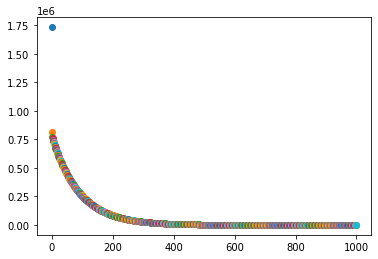

In [ ]:
theta_deg_3 = learning_algo_LR(1000, .000005, X_deg_3, Y_1)

776355.686607008
767634.4336443602
759015.1821411442
750496.576065678
742077.2838837267
733755.9978890315
725531.4335580013
717402.3289275913
709367.4439954406
701425.5601413717
693575.4795693997
685816.024769427
678146.03799784
670564.3807762524
663069.9334076737
655661.5945094088
648338.2805620268
641098.92547376
633942.4801597263
626867.9121353872
619874.2051236831
612960.3586753057
606125.3878015961
599368.3226195708
592688.2080086042
586084.1032783131
579555.0818472075
573100.2309316895
566718.6512450031
560409.4567057459
554171.7741555804
548004.7430857873
541907.5153723242
535879.255019067
529919.1379089177
524026.3515624859
518200.09490405244
512439.5780345451
506744.0220112581
501112.65863406786
495544.73023789714
490039.4894911999
484596.1992002411
479214.13211895677
473892.5707641908
468630.8072361111
463428.14304361463
458283.8889345409
453197.3647305198
448167.8991662863
443194.8297333014
438277.50252752687
433415.2721012026
428607.5013184898
423853.5612148376
419152.83085

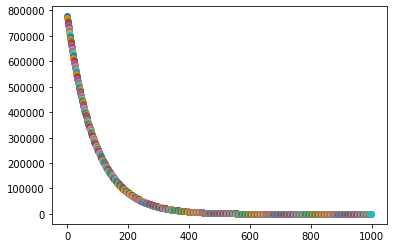

In [ ]:
theta_deg_2 = learning_algo_LR(1000, .000005, X_deg_2, Y_1)


727032.420621546
727032.4080972692
727032.395576986
727032.3830606944
727032.370548394
727032.3580400831
727032.3455357603
727032.3330354238
727032.3205390732
727032.3080467061
727032.2955583221
727032.2830739192
727032.2705934965
727032.2581170525
727032.2456445856
727032.2331760948
727032.2207115784
727032.2082510355
727032.1957944647
727032.183341864
727032.170893233
727032.1584485697
727032.1460078731
727032.1335711417
727032.1211383742
727032.1087095693
727032.0962847256
727032.0838638417
727032.0714469164
727032.0590339485
727032.0466249359
727032.0342198785
727032.0218187742
727032.0094216214
727031.9970284193
727031.9846391665
727031.9722538615
727031.959872503
727031.9474950896
727031.9351216202
727031.9227520934
727031.9103865077
727031.8980248619
727031.8856671548
727031.8733133846
727031.8609635505
727031.8486176509
727031.8362756844
727031.82393765
727031.811603546
727031.7992733712
727031.7869471246
727031.7746248044
727031.7623064093
727031.7499919386
727031.73768139
727

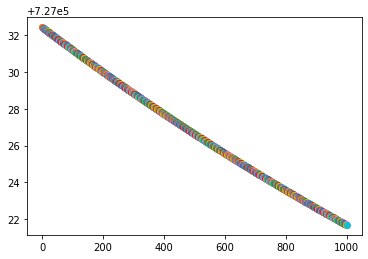

In [ ]:
theta_deg_1 = learning_algo_LR(1000, .000005, X_deg_1, Y_1)

In [ ]:
Y_pred_deg_1 = np.dot(X_Test_1, theta_deg_1)
rms_error(Y_pred_deg_1, Y_Test_1)

1206.007445980683

In [ ]:
Y_pred_deg_2 = np.dot(X_Test_2, theta_deg_2)
rms_error(Y_pred_deg_2, Y_Test_1)

10.24660211619908

In [ ]:
Y_pred_deg_3 = np.dot(X_Test_3, theta_deg_3)
rms_error(Y_pred_deg_3, Y_Test_1)

8.408880336552249